In [ ]:
%git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -r requirements.txt  # install

In [1]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.16 torch-1.13.1 CPU


Setup complete ✅ (4 CPUs, 8.0 GB RAM, 289.4/420.1 GB disk)


In [ ]:
def create_data_directories(data_name):
    Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

    
create_data_directories('nestle_marker')

Treinamento do modelo

In [2]:
!python train.py --batch 16 --epochs 5 --data 'data/nestle.yaml' --weights 'yolov5s6.pt' --project 'runs_nestle' --name 'feature_extraction' --cache --freeze 12

train: weights=yolov5s6.pt, cfg=, data=data/nestle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_nestle, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.16 torch-1.13.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0

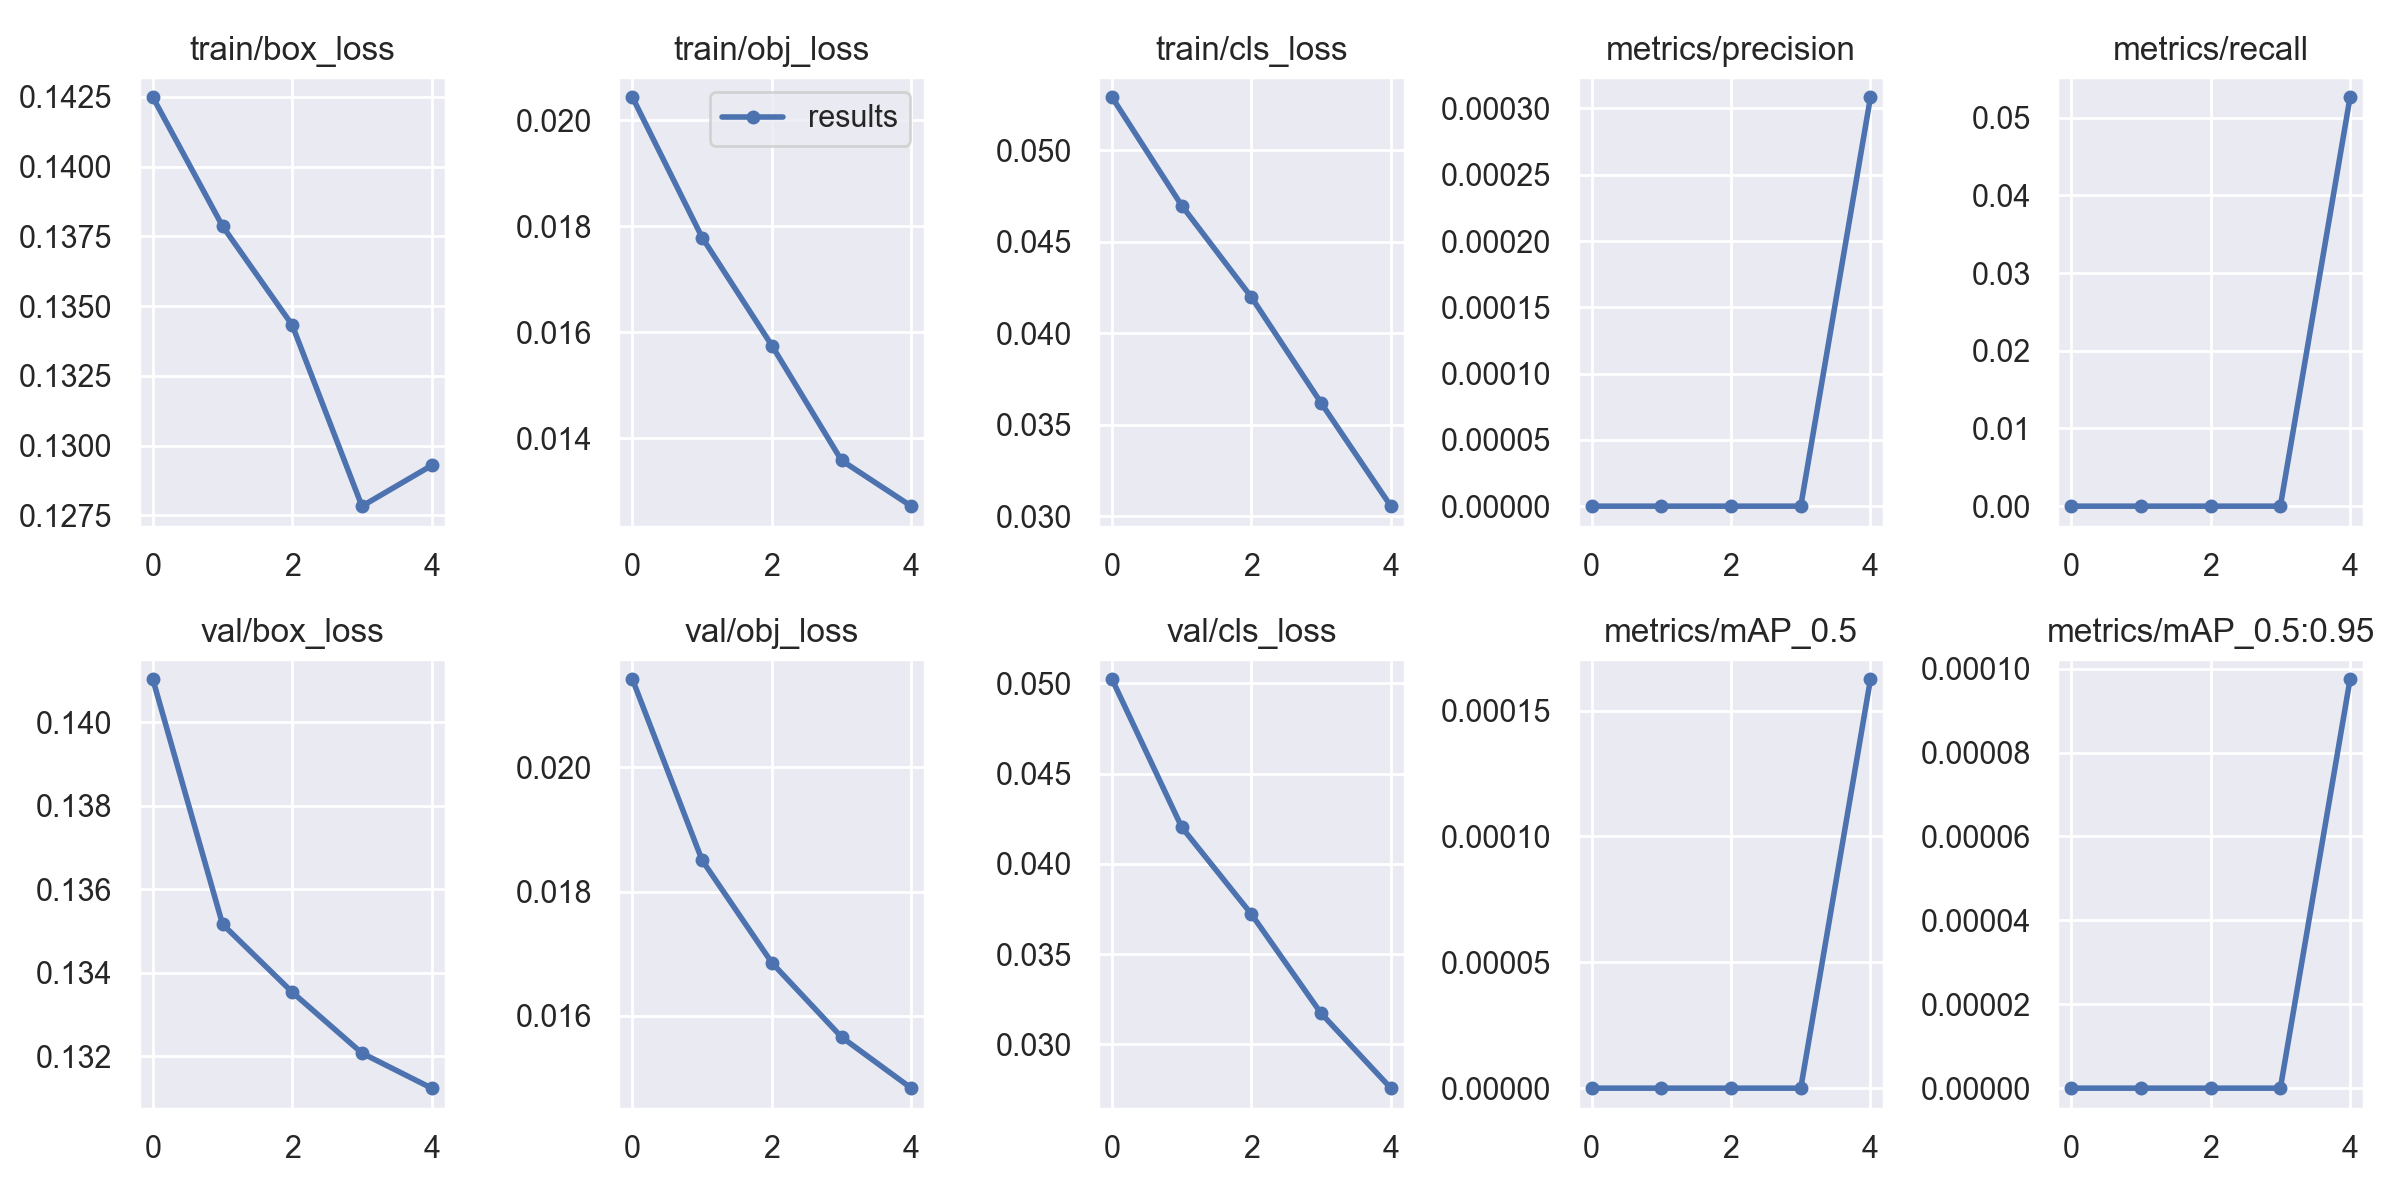

In [3]:
display.Image(f"runs_nestle/feature_extraction/results.png")

### <font color=003762>Fine Tuning

In [7]:
!python train.py --hyp 'data/hyps/hyp.VOC.yaml' --batch 16 --epochs 10 --data 'data/nestle.yaml' --weights 'runs_nestle/feature_extraction/weights/best.pt' --project 'runs_nestle' --name 'fine-tuning' --cache

train: weights=runs_nestle/feature_extraction/weights/best.pt, cfg=, data=data/nestle.yaml, hyp=data/hyps/hyp.VOC.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_nestle, name=fine-tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.16 torch-1.13.1 CPU

hyperparameters: lr0=0.00334, lrf=0.15135, momentum=0.74832, weight_decay=0.00025, warmup_epochs=3.3835, warmup_momentum=0.59462, warmup_bias_lr=0.18657, box=0.02, cls=0.21638, cls_pw=0.5, obj=0.51728, obj_pw=0.67198, iou_t=0.2, anchor_t=3.3744, fl_

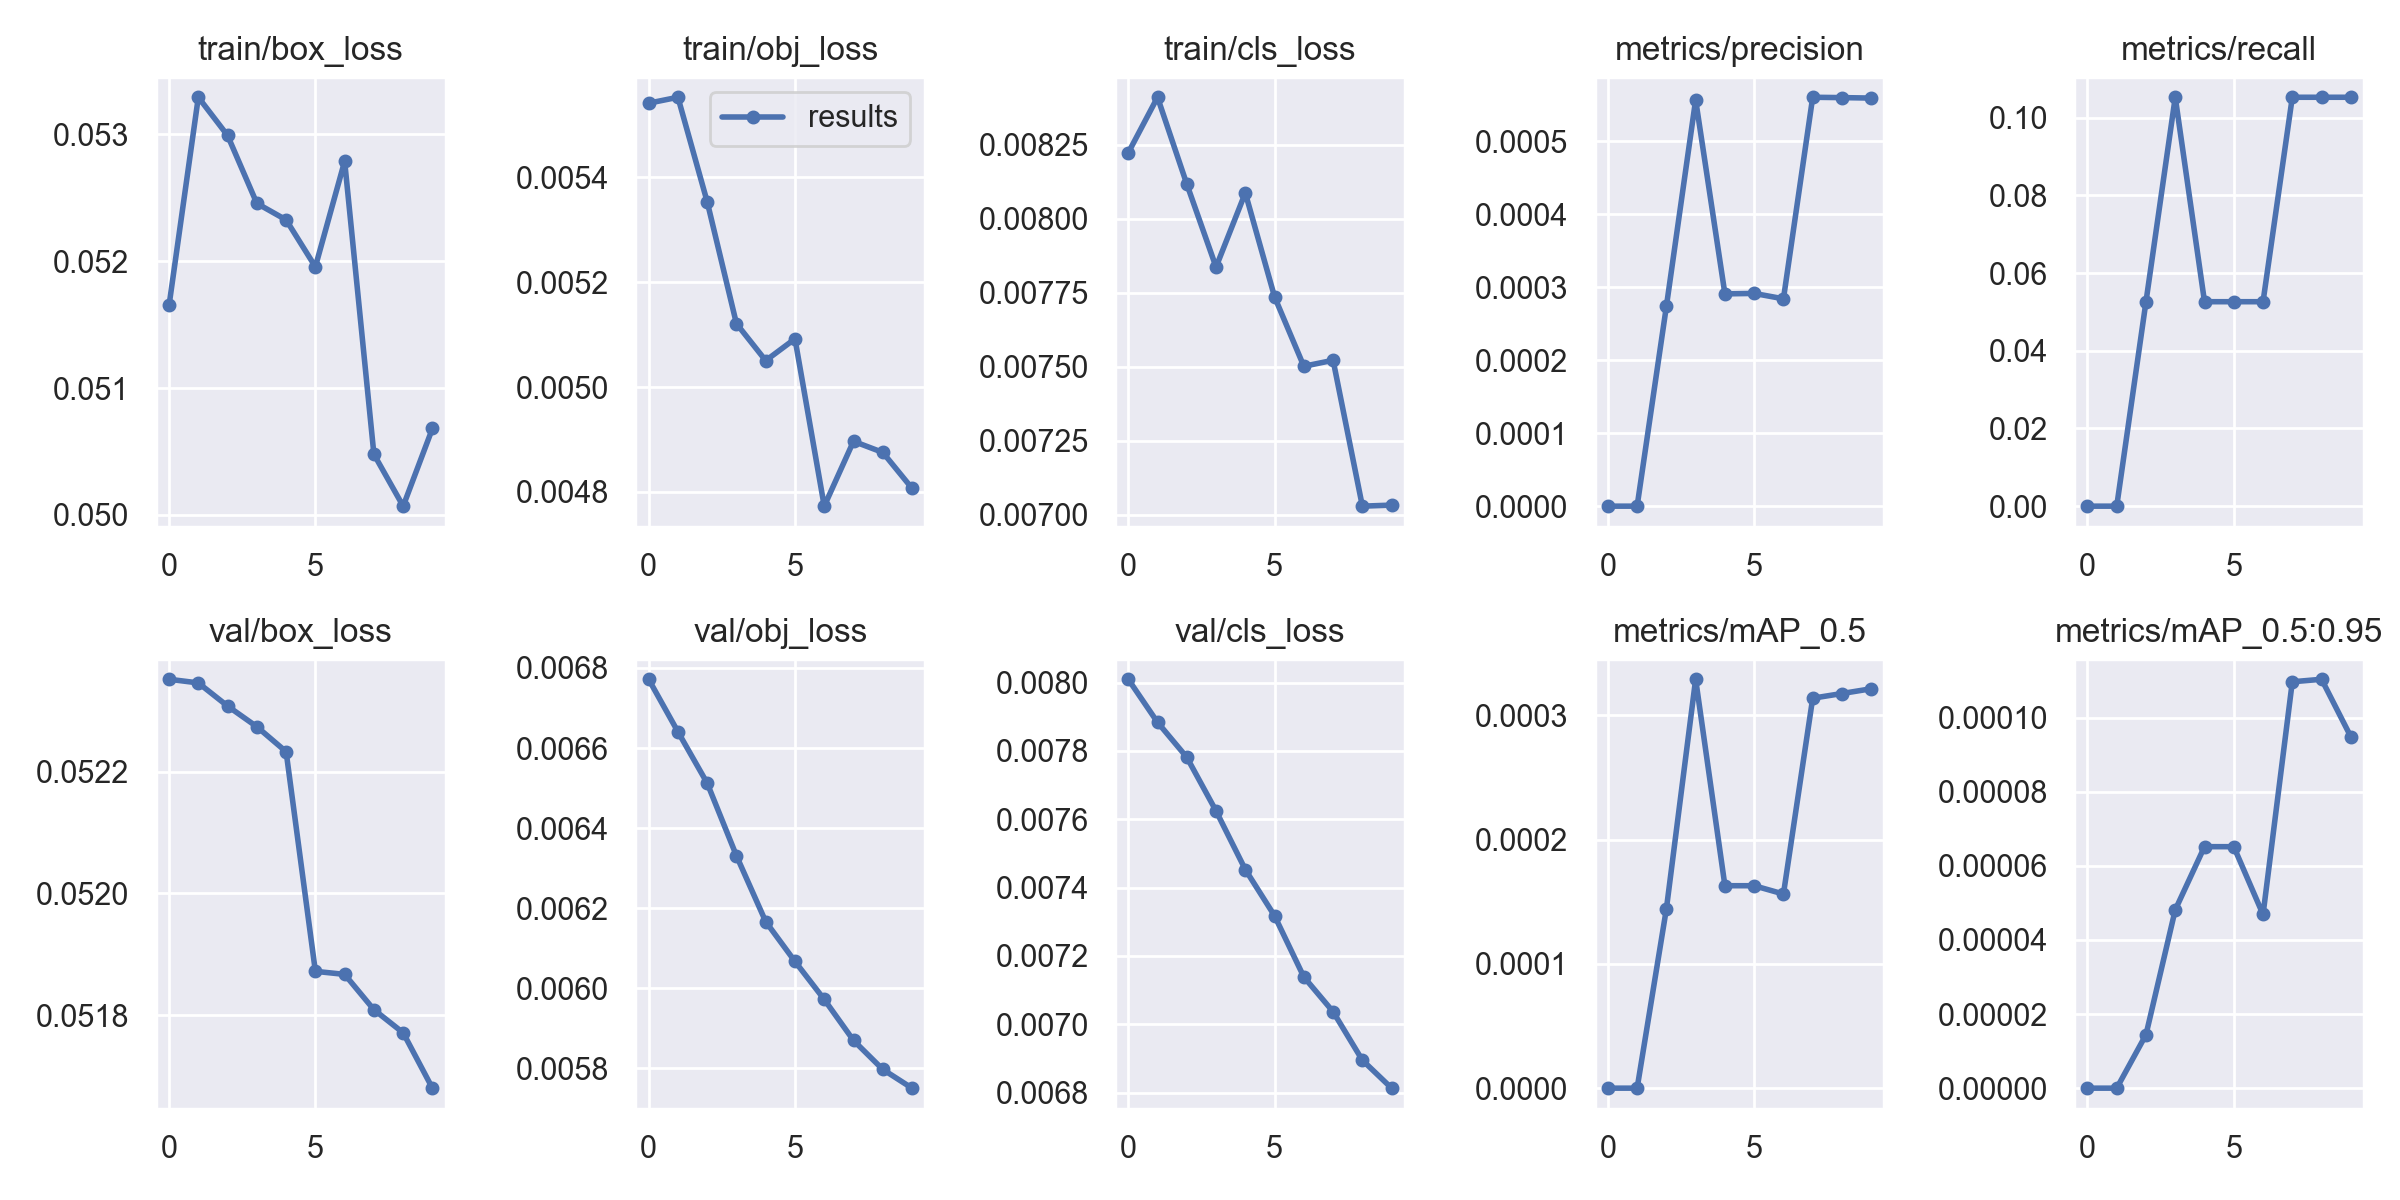

In [9]:
display.Image(f"runs_nestle/fine-tuning/results.png")

### <font color=003762>Validation

In [11]:
!python val.py --weights 'runs_nestle/fine-tuning/weights/best.pt' --batch 16 --data 'data/nestle.yaml' --task test --project 'runs_nestle' --name 'validation_on_test_data' --augment

val: data=data/nestle.yaml, weights=['runs_nestle/fine-tuning/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs_nestle, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.16 torch-1.13.1 CPU

Fusing layers... 
Model summary: 206 layers, 12323608 parameters, 0 gradients, 16.2 GFLOPs
test: Scanning /Users/Oseas/Documents/nestle-safety/datasets/nestle_marker/label
test: New cache created: /Users/Oseas/Documents/nestle-safety/datasets/nestle_marker/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances          P          R      mAP50   WARNING ⚠️ NMS time limit 0.900s exceeded
                 Class     Images

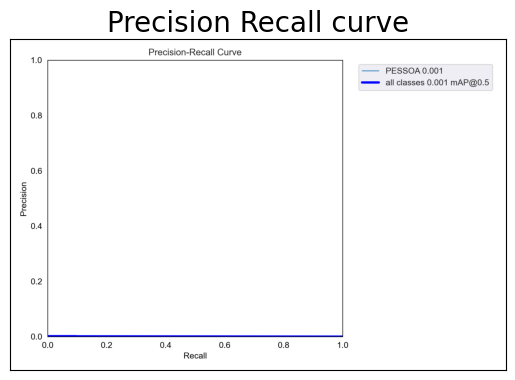

In [12]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_nestle/validation_on_test_data/PR_curve.png'))

## <font color=2892A8>Predicoes</font>

In [15]:
!python detect.py --weights 'runs_nestle/fine-tuning/weights/best.pt'  --conf 0.6 --source '../datasets/nestle_marker/images/test' --project 'runs_nestle' --name 'detect_test' --augment --line=3
clear_output()

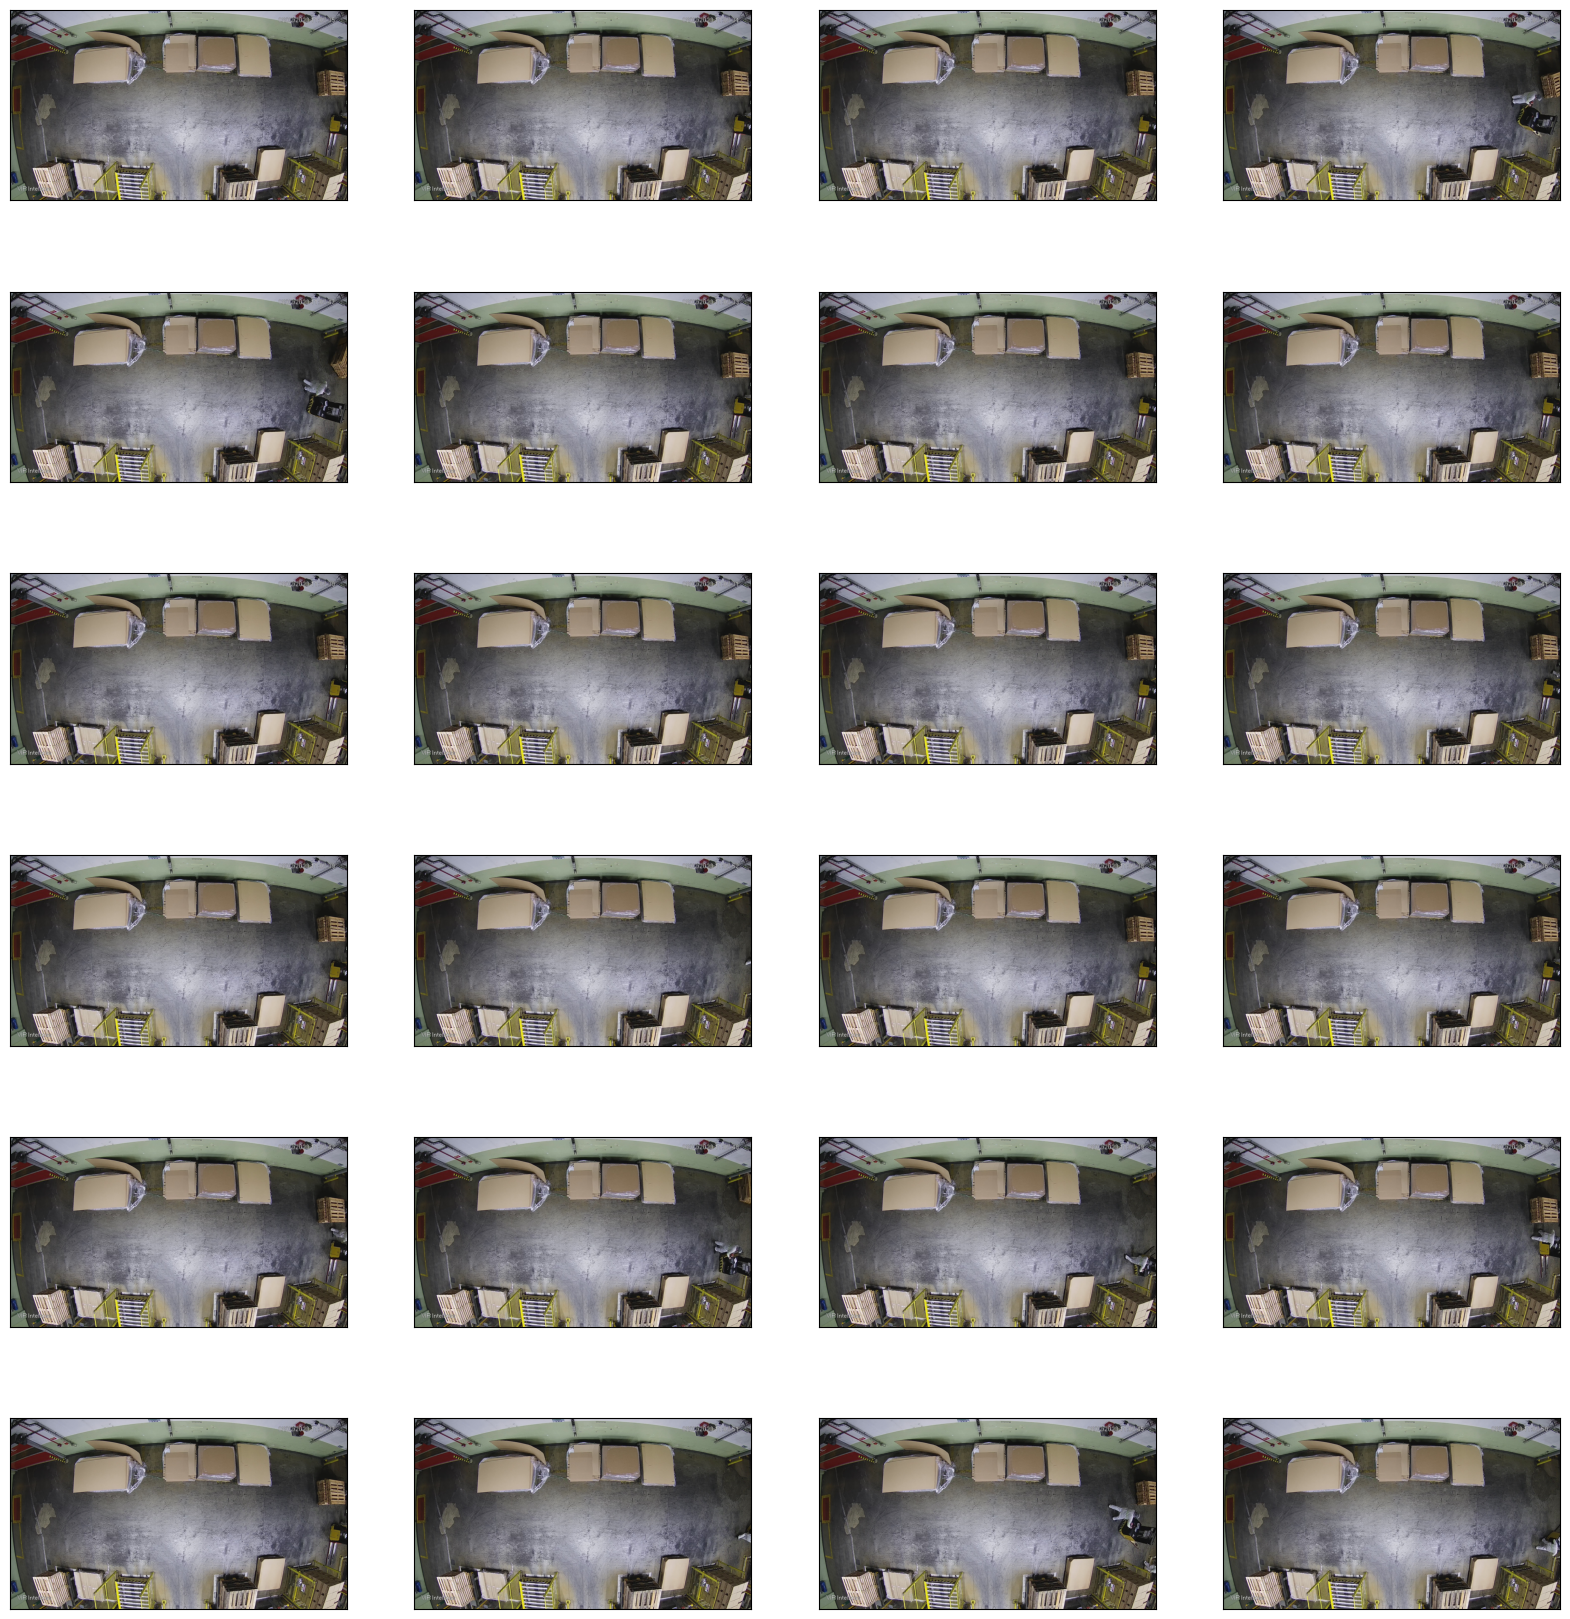

In [16]:
detect_path = r'runs_nestle/detect_test'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)